# データの可視化
1. 天体の基本的な特性の分布:
- mag_auto (自動等級) のヒストグラムを作成し、天体の明るさの分布を可視化してください。
- area_auto (自動面積) のヒストグラムを作成し、天体のサイズの分布を可視化してください。
- 既知の赤方偏移 z_spec がある天体について、赤方偏移のヒストグラムを作成し、宇宙のどのくらいの距離の天体が観測されているかを確認してください。
2. 異なるフィルター間の関係性 (色-色図):
- 例えば、f115w_flux_aper_1 と f150w_flux_aper_1 のフラックスを使って、色 (f115w - f150w) を計算します。同様に、別のフィルターペア（例: f150w と f200w）でも色を計算します。
- これらの2つの色を軸とした散布図（色-色図）を作成し、天体の分布を調べてください。異なる種類の天体は異なる領域に分布する可能性があります。
3. 天体の空間分布:
- ra (赤経) と dec (赤緯) を用いて、観測された天体の空における分布を散布図で可視化してください。分布に偏りがあるかなどを確認できます。
4. 物理量間の関係性:
- mag_auto (等級) と area_auto (面積) の散布図を作成し、明るい天体と暗い天体のサイズに違いがあるかなどを調べてください。
- 既知の赤方偏移 z_spec がある天体について、z_spec と mag_auto の散布図を作成し、遠い天体ほど暗く見える傾向があるかなどを確認してください。

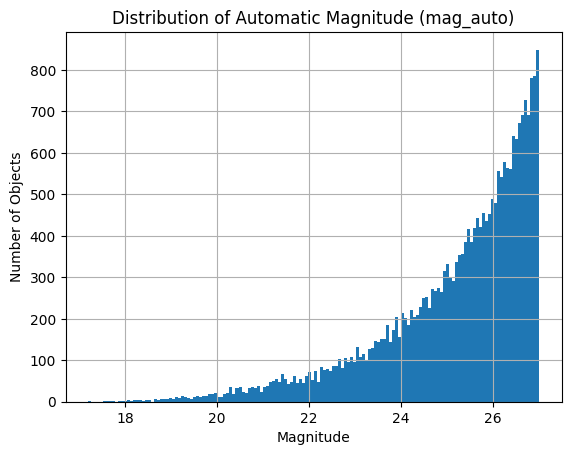

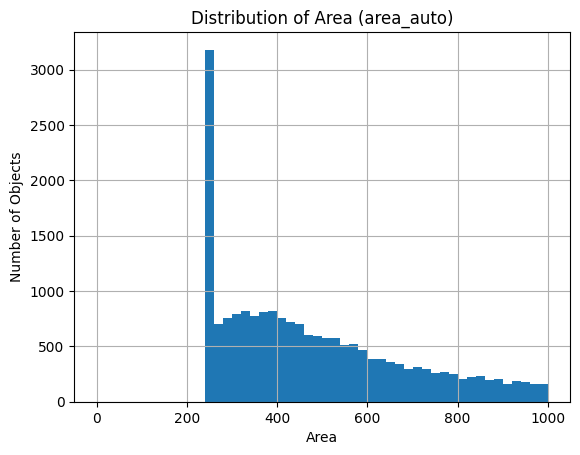

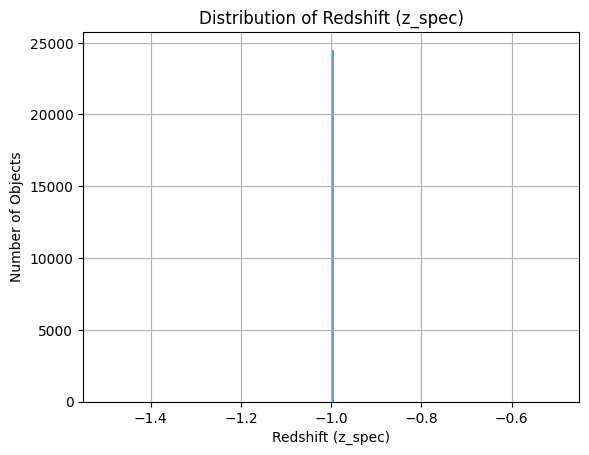

In [7]:
from torch.utils.data import DataLoader
from custom_dataset import HDF5Dataset

# 特徴量として使用する列名
features = [
    'mag_auto',
    'area_auto',
    'z_spec',
    'f115w_flux_aper_1',
    'f150w_flux_aper_1',
    'f200w_flux_aper_1'
]
# ターゲット変数 (予測したい変数)
target = 'area_auto'
dataset = HDF5Dataset("ceers.hdf5", features + [target], None)
dataloader = DataLoader(dataset, batch_size=len(dataset), shuffle=True)
# Draw histogram
import matplotlib.pyplot as plt
import numpy as np
# DataLoader から 1 バッチ取得
for batch in dataloader:
    data = {key: batch[key].numpy() for key in features + [target]}
    break  # 最初のバッチのみ使用
# Draw histogram Magnitude
# MEMO: このヒストグラムから、最も頻繁に見られる等級や、明るい天体と暗い天体の数の比率などを読み取ることができます。
plt.hist(data['mag_auto'], bins=150, alpha=1)
plt.xlabel('Magnitude')
plt.ylabel('Number of Objects')
plt.title('Distribution of Automatic Magnitude (mag_auto)')
plt.grid()
plt.show()
# Draw histogram Area
# MEMO: このヒストグラムから、小さな天体が多いのか、大きな天体も一定数存在するのかなどを確認できます。面積の分布は対数正規分布のような形状になることが多いです。
plt.hist(data['area_auto'], bins=50, alpha=1, range=(0, 1000))
plt.xlabel('Area')
plt.ylabel('Number of Objects')
plt.title('Distribution of Area (area_auto)')
plt.grid()
plt.show()
# Draw histogram Redshift -> 欠損値が多いため、ヒストグラムの形状が不明瞭。
# MEMO: このヒストグラムから、赤方偏移の分布を確認できます。特に、遠くの天体ほど赤方偏移が大きくなる傾向があります。
plt.hist(data['z_spec'], bins=150, alpha=0.7)
plt.xlabel('Redshift (z_spec)')
plt.ylabel('Number of Objects')
plt.title('Distribution of Redshift (z_spec)')
plt.grid()
plt.show()
# Draw histogram f115w_flux_aper_1
# MEMO: このヒストグラムから、フラックスの分布を確認できます。特に、明るい天体ほどフラックスが大きくなる傾向があります。
# plt.hist(data['f115w_flux_aper_1'], bins=150, alpha=1)
# plt.xlabel('Flux (f115w_flux_aper_1)')
# plt.ylabel('Number of Objects')
# plt.title('Distribution of Flux (f115w_flux_aper_1)')
# plt.grid()
# plt.show()
# # Draw histogram f200w_flux_aper_1
# # MEMO: このヒストグラムから、フラックスの分布を確認できます。特に、明るい天体ほどフラックスが大きくなる傾向があります。
# plt.hist(data['f200w_flux_aper_1'], bins=150, alpha=1)
# plt.xlabel('Flux (f200w_flux_aper_1)')
# plt.ylabel('Number of Objects')
# plt.title('Distribution of Flux (f200w_flux_aper_1)')
# plt.grid()
# plt.show()
# 色の分布 (等級を用いた例)
# MEMO: このヒストグラムから、色の分布を確認できます。特に、赤方偏移や星の進化段階に応じて色が変化することがあります。
# mag1 = -2.5 * np.log10(data['f115w_flux_aper_1'])
# mag2 = -2.5 * np.log10(data['f150w_flux_aper_1'])
# color = mag1 - mag2
# plt.hist(color, bins=150, alpha=1)
# plt.xlabel('Magnitude Difference ({filter1_flux_col.split("_")[0]} - {filter2_flux_col.split("_")[0]})')
# plt.ylabel('Number of Objects')
# plt.title('Distribution of Color ({filter1_flux_col.split("_")[0]} - {filter2_flux_col.split("_")[0]})')
# plt.grid()
# plt.show()